In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, validation_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
import time
import kagglehub
import os
warnings.filterwarnings('ignore')

In [ ]:
# Load the Data

path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")
print(path)


df = pd.read_csv('/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')


/kaggle/input/extrovert-vs-introvert-behavior-data


In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
# change to number values

df['Stage_fear'] = df['Stage_fear'].map({'Yes': 1, 'No': 0})

df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'Yes': 1, 'No': 0})


In [ ]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,Extrovert
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,Introvert
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,Introvert
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,Extrovert
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,Extrovert


In [ ]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
count,2837.000000,2827.000000,2838.000000,2834.000000,2848.000000,2823.000000,2835.000000
mean,4.505816,0.498762,3.963354,3.000000,0.494031,6.268863,3.564727
std,3.479192,0.500087,2.903827,2.247327,0.500052,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000
75%,8.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   float64
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   float64
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(7), object(1)
memory usage: 181.4+ KB


In [ ]:

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset shape: (2477, 8)
Columns: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']


In [ ]:
# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())


Missing values:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [ ]:
# drop missing values (not enough to affect dataset)
df.dropna(inplace = True)

In [ ]:
# check again
print(f"\nMissing values:")
print(df.isnull().sum())


Missing values:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   float64
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   float64
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(7), object(1)
memory usage: 174.2+ KB


In [ ]:
# see how data is split

print(f"\nTarget variable distribution:")
print(df['Personality'].value_counts())
print(f"Target percentages:")
print(df['Personality'].value_counts(normalize=True) * 100)


Target variable distribution:
Personality
Extrovert    1274
Introvert    1203
Name: count, dtype: int64
Target percentages:
Personality
Extrovert    51.433185
Introvert    48.566815
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribution of Personality')

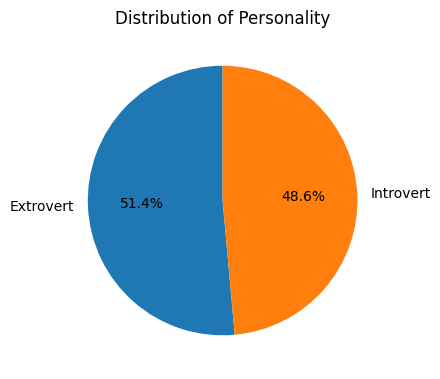

In [ ]:
# Set up the plotting style
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# Visualization 1: Target distribution
plt.subplot(3, 4, 1)
personality_counts = df['Personality'].value_counts()
plt.pie(personality_counts.values, labels=personality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Personality')

Text(0.5, 1.0, 'Feature Correlation Matrix')

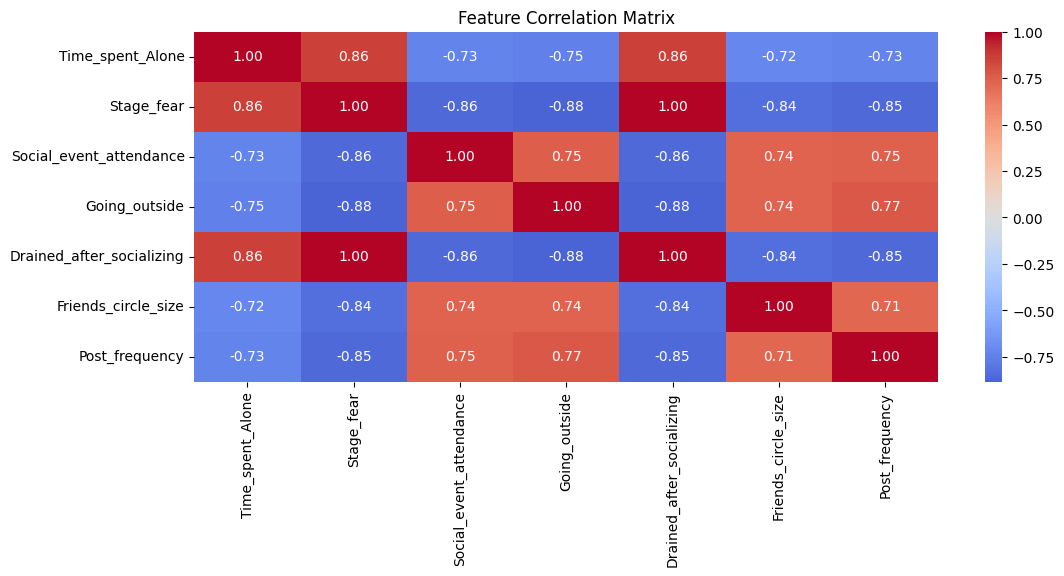

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 2)
df_numeric = df.copy()
le = LabelEncoder()
df_numeric['Personality'] = le.fit_transform(df_numeric['Personality'])
correlation_matrix = df_numeric.drop('Personality', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')

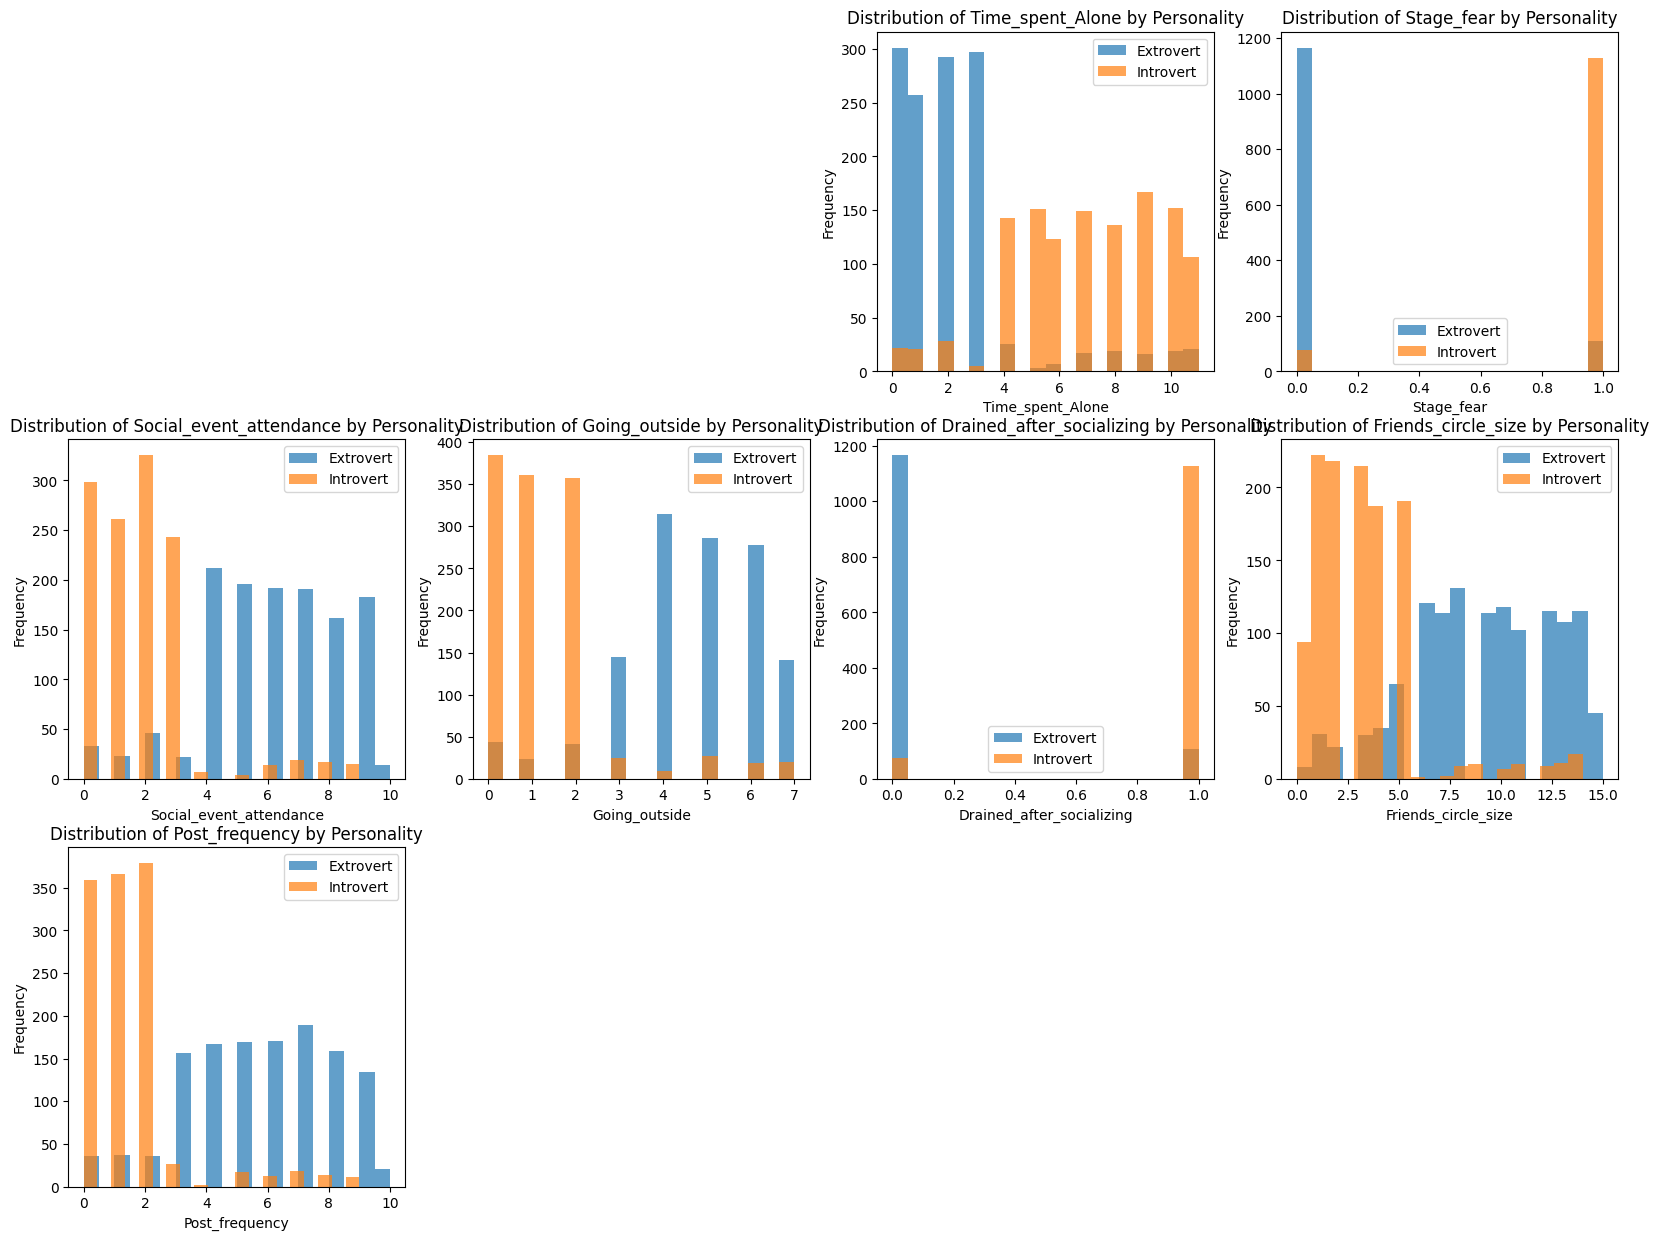

In [ ]:
plt.figure(figsize=(20, 15))

features = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
for i, feature in enumerate(features):
    plt.subplot(3, 4, i+3)
    for personality in df['Personality'].unique():
        data = df[df['Personality'] == personality][feature]
        plt.hist(data, alpha=0.7, label=personality, bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} by Personality')
    plt.legend()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Time_spent_Alone'),
  Text(1, 0, 'Social_event_attendance'),
  Text(2, 0, 'Going_outside'),
  Text(3, 0, 'Friends_circle_size'),
  Text(4, 0, 'Post_frequency')])

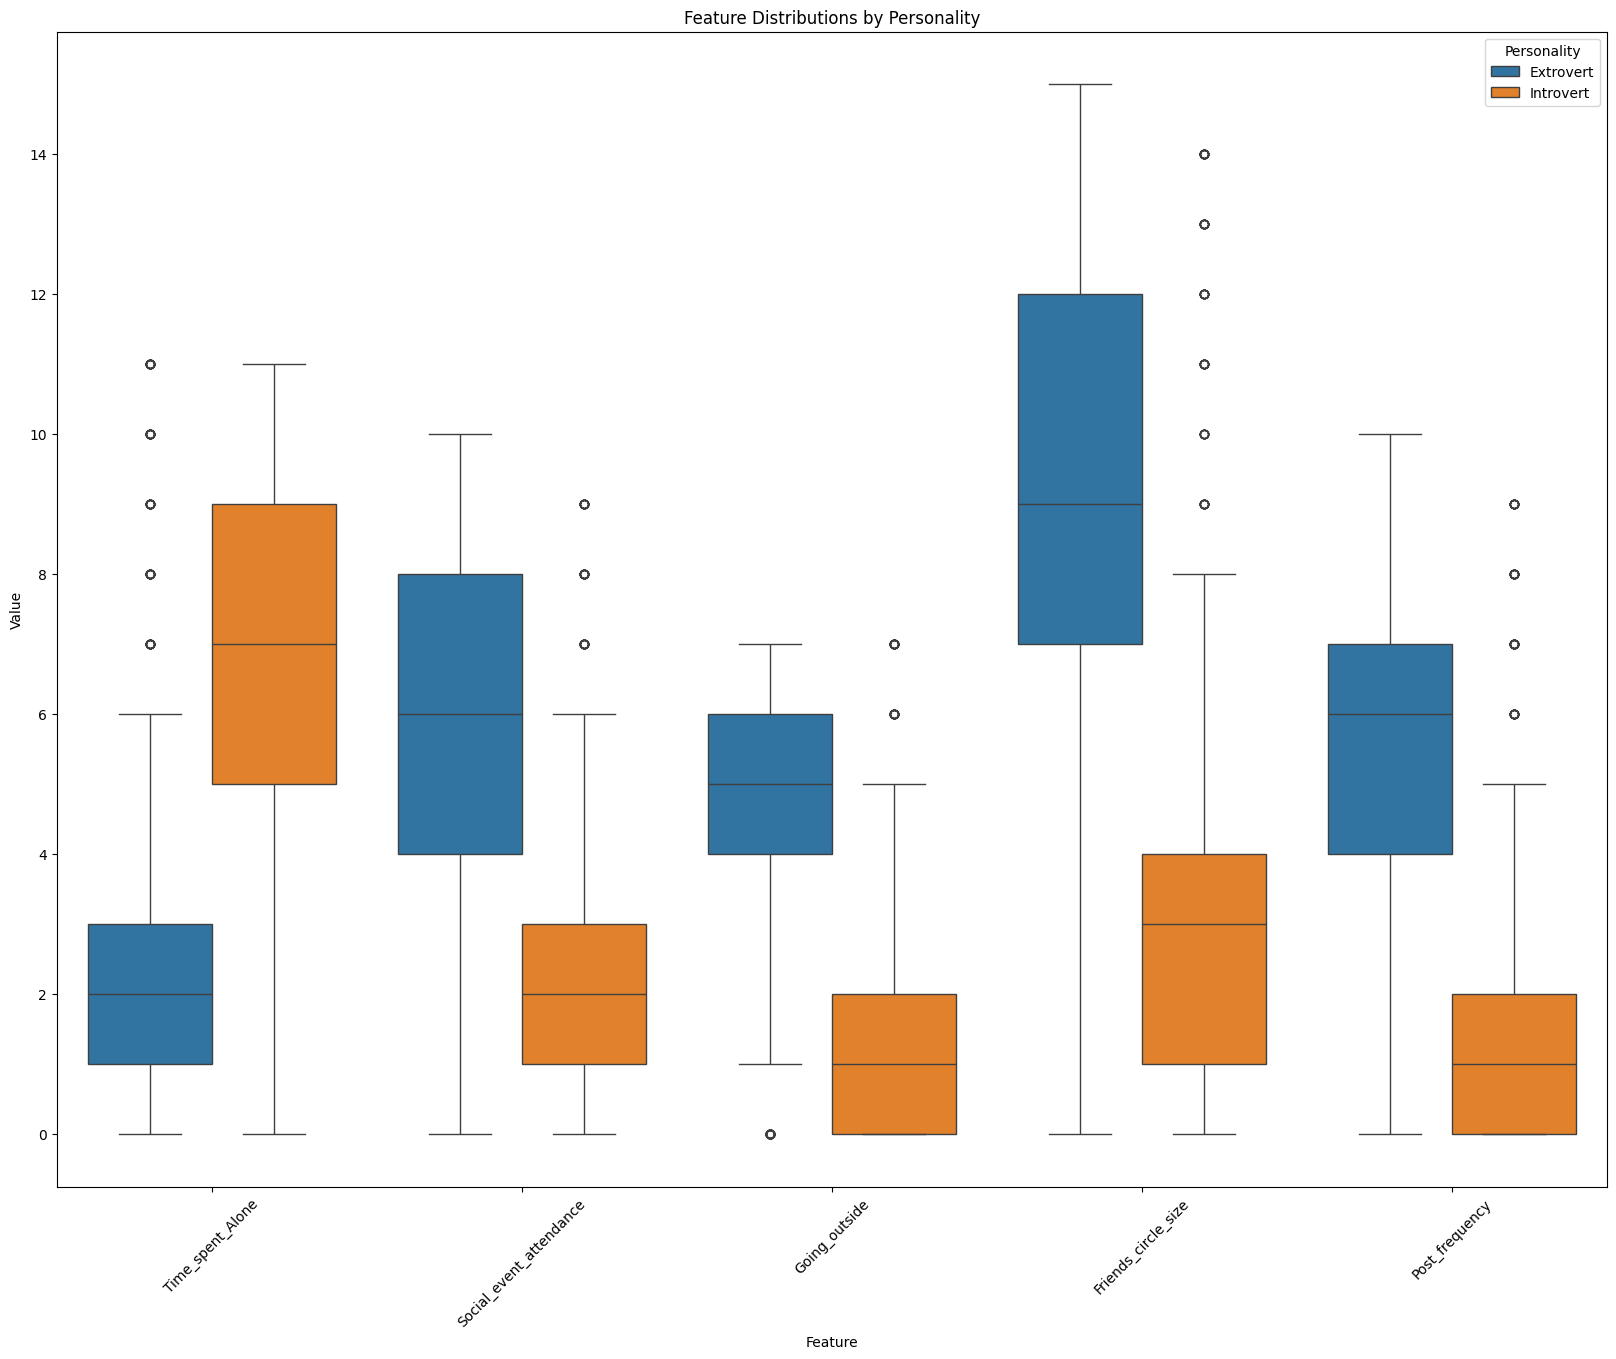

In [ ]:

# Box plots

plt.figure(figsize=(20, 15))
df_melted = df.melt(id_vars=['Personality'],
                    value_vars=['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'],
                    var_name='Feature', value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value', hue='Personality')
plt.title('Feature Distributions by Personality')
plt.xticks(rotation=45)

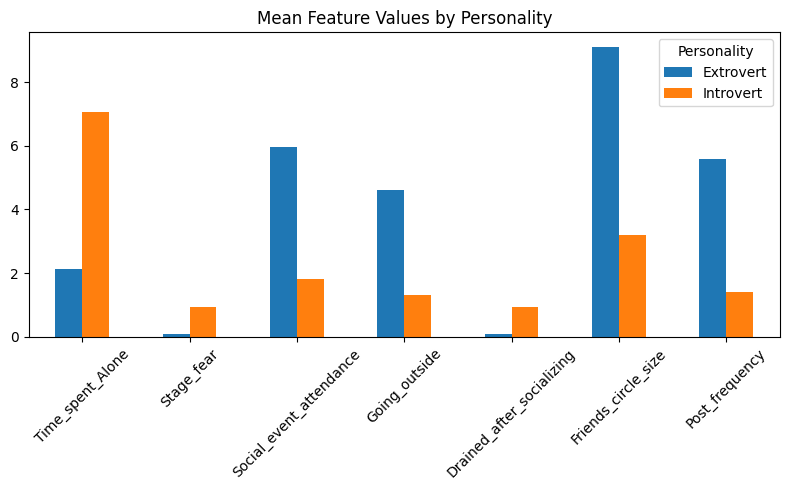

In [ ]:
# Feature importance preview
plt.figure(figsize=(8, 5))
feature_cols = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency']
feature_means = df.groupby('Personality')[feature_cols].mean()
feature_means.T.plot(kind='bar', ax=plt.gca())
plt.title('Mean Feature Values by Personality')
plt.xticks(rotation=45)
plt.legend(title='Personality')

plt.tight_layout()
plt.show()

In [ ]:
# data preprocessing

# Prepare features and target
X = df.drop('Personality', axis=1)
y = df['Personality']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded classes: {np.unique(y_encoded)}")
print()

# Split the data (70:30 as required)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Original classes: ['Extrovert' 'Introvert']
Encoded classes: [0 1]

Training set size: (1733, 7)
Test set size: (744, 7)


In [ ]:
# Standardization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Original feature means: {X_train.mean().round(3).to_dict()}")
print(f"Scaled feature means: {np.mean(X_train_scaled, axis=0).round(3)}")
print(f"Scaled feature stds: {np.std(X_train_scaled, axis=0).round(3)}")

Original feature means: {'Time_spent_Alone': 4.507, 'Stage_fear': 0.495, 'Social_event_attendance': 3.942, 'Going_outside': 3.014, 'Drained_after_socializing': 0.495, 'Friends_circle_size': 6.244, 'Post_frequency': 3.594}
Scaled feature means: [ 0. -0. -0.  0. -0. -0. -0.]
Scaled feature stds: [1. 1. 1. 1. 1. 1. 1.]


Testing k values: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]

Optimal k value: 13
Best validation accuracy: 0.9279


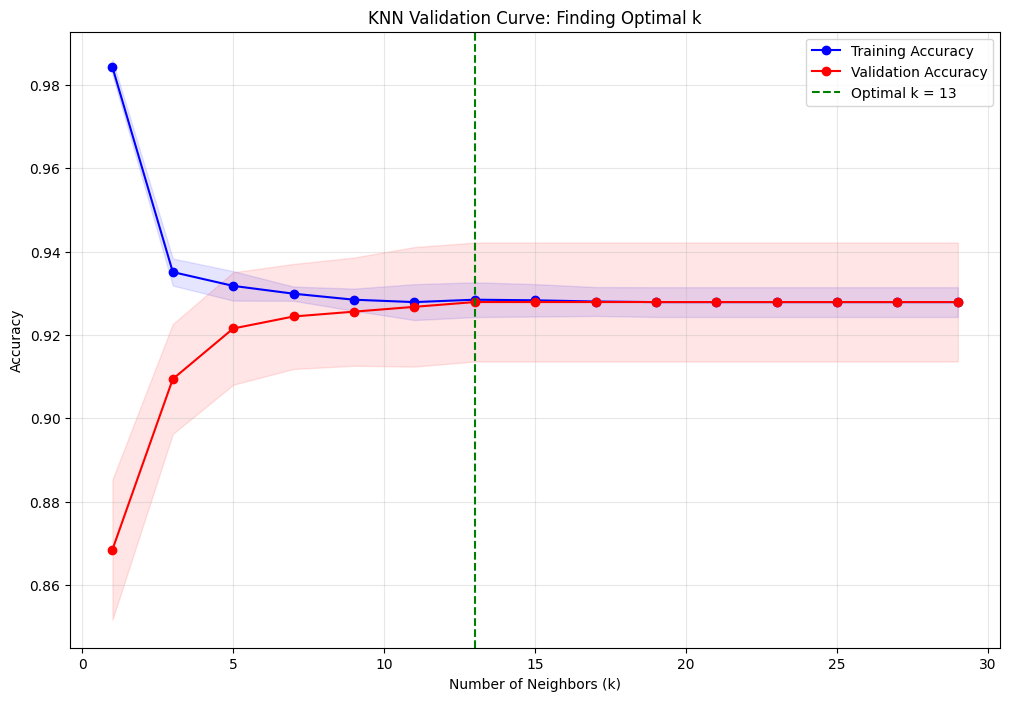


5b. Testing Different Distance Metrics for k=13...
Distance metric 'euclidean': CV Accuracy = 0.9279
Distance metric 'manhattan': CV Accuracy = 0.9279
Distance metric 'minkowski': CV Accuracy = 0.9279
Best distance metric: euclidean


In [ ]:
# Finding Optimal K for KNN

# Test different k values using validation curve
k_range = np.arange(1, 31, 2)  # Test odd numbers from 1 to 29
print(f"Testing k values: {k_range}")

# Use validation curve to find optimal k
train_scores, val_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train,
    param_name='n_neighbors', param_range=k_range,
    cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean and std for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Find optimal k
optimal_k_idx = np.argmax(val_mean)
optimal_k = k_range[optimal_k_idx]

print(f"\nOptimal k value: {optimal_k}")
print(f"Best validation accuracy: {val_mean[optimal_k_idx]:.4f}")

# Plot validation curve for KNN
plt.figure(figsize=(12, 8))
plt.plot(k_range, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(k_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(k_range, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(k_range, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Validation Curve: Finding Optimal k')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Additional analysis: Different distance metrics for optimal k
print(f"\n5b. Testing Different Distance Metrics for k={optimal_k}...")

distance_metrics = ['euclidean', 'manhattan', 'minkowski']
distance_scores = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    distance_scores[metric] = scores.mean()
    print(f"Distance metric '{metric}': CV Accuracy = {scores.mean():.4f}")

best_metric = max(distance_scores, key=distance_scores.get)
print(f"Best distance metric: {best_metric}")

In [ ]:
# Model Implementation

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'SVM (Polynomial)': SVC(kernel='poly', degree=3, random_state=42),
    'SVM (Sigmoid)': SVC(kernel='sigmoid', random_state=42),
    'SVM (RBF-Tuned)': SVC(kernel='rbf', C=10, gamma='scale', random_state=42),
    'K-Nearest Neighbors (Default)': KNeighborsClassifier(n_neighbors=5),
    f'K-Nearest Neighbors (Optimal k={optimal_k})': KNeighborsClassifier(
        n_neighbors=optimal_k, metric=best_metric
    )
}

print(f"Models to be evaluated:")
for name, model in models.items():
    print(f" -  {name}")

Models to be evaluated:
 -  Logistic Regression
 -  Naive Bayes
 -  Decision Tree
 -  Random Forest
 -  SVM (Linear)
 -  SVM (RBF)
 -  SVM (Polynomial)
 -  SVM (Sigmoid)
 -  SVM (RBF-Tuned)
 -  K-Nearest Neighbors (Default)
 -  K-Nearest Neighbors (Optimal k=13)


Evaluating Logistic Regression...
  CV Accuracy: 0.9279 (+/- 0.0215)


Evaluating Naive Bayes...
  CV Accuracy: 0.9279 (+/- 0.0215)


Evaluating Decision Tree...
  CV Accuracy: 0.8534 (+/- 0.0518)


Evaluating Random Forest...
  CV Accuracy: 0.9094 (+/- 0.0297)


Evaluating SVM (Linear)...
  CV Accuracy: 0.9279 (+/- 0.0215)


Evaluating SVM (RBF)...
  CV Accuracy: 0.9279 (+/- 0.0215)


Evaluating SVM (Polynomial)...
  CV Accuracy: 0.9279 (+/- 0.0215)


Evaluating SVM (Sigmoid)...
  CV Accuracy: 0.9261 (+/- 0.0214)


Evaluating SVM (RBF-Tuned)...
  CV Accuracy: 0.9279 (+/- 0.0215)


Evaluating K-Nearest Neighbors (Default)...
  CV Accuracy: 0.9192 (+/- 0.0320)


Evaluating K-Nearest Neighbors (Optimal k=13)...
  CV Accuracy: 0.9285 (+/- 0.0220)




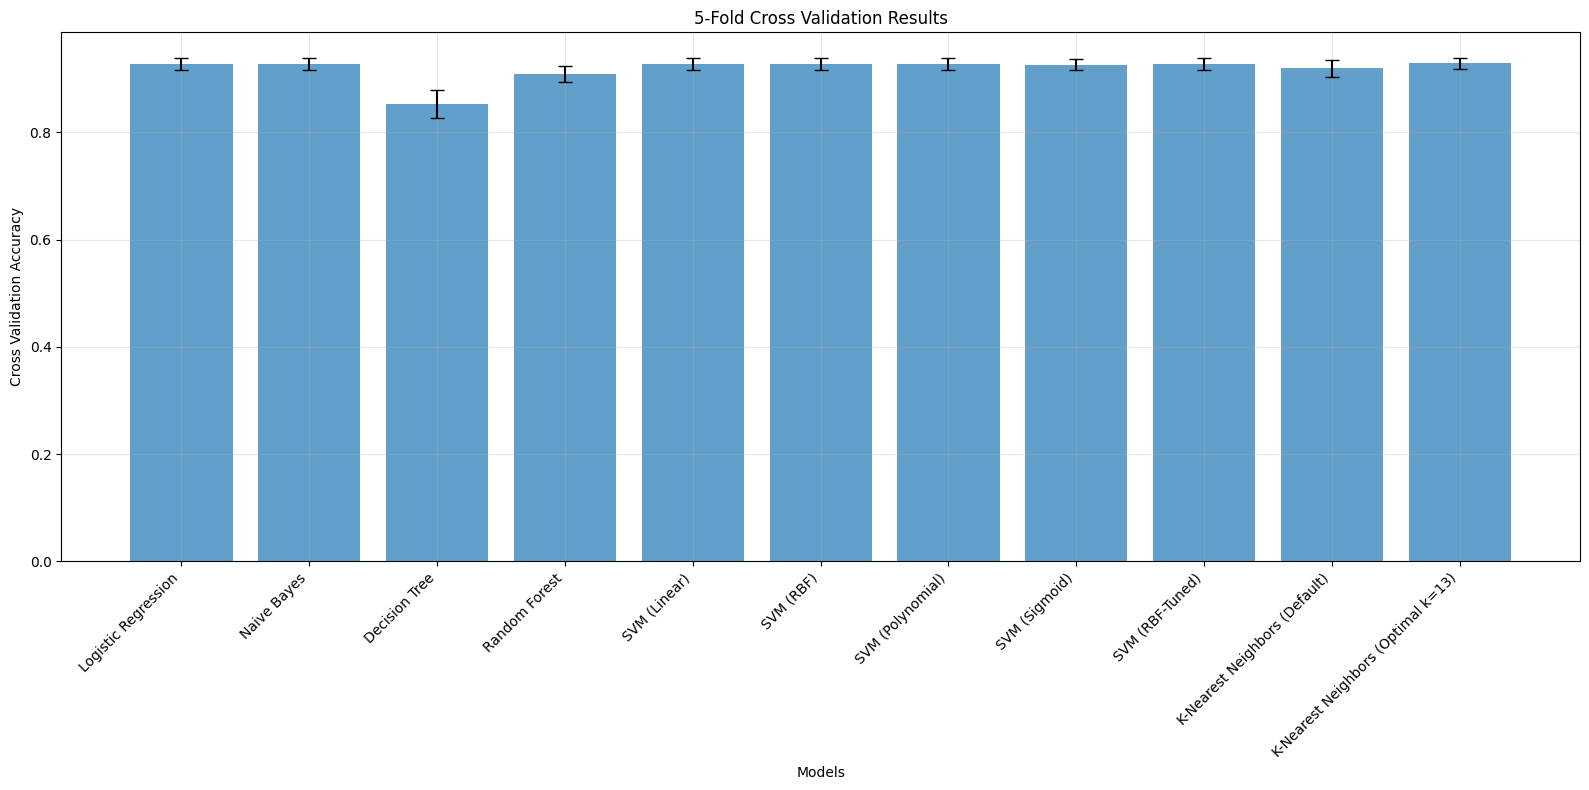

In [ ]:
# Cross-Validation

# Perform cross validation
cv_scores = {}
cv_folds = 5
kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    cv_scores[name] = scores
    print(f"  CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print('\n')

# Plot cross validation results
plt.figure(figsize=(16, 8))
model_names = list(cv_scores.keys())
cv_means = [cv_scores[name].mean() for name in model_names]
cv_stds = [cv_scores[name].std() for name in model_names]

plt.bar(range(len(model_names)), cv_means, yerr=cv_stds, capsize=5, alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Cross Validation Accuracy')
plt.title('5-Fold Cross Validation Results')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# dictionaries to store metrics
trained_models = {}
predictions = {}
test_accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[name] = test_accuracy

    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print()

Training Logistic Regression...
  Test Accuracy: 0.9194

Training Naive Bayes...
  Test Accuracy: 0.9194

Training Decision Tree...
  Test Accuracy: 0.8387

Training Random Forest...
  Test Accuracy: 0.9059

Training SVM (Linear)...
  Test Accuracy: 0.9194

Training SVM (RBF)...
  Test Accuracy: 0.9194

Training SVM (Polynomial)...
  Test Accuracy: 0.9194

Training SVM (Sigmoid)...
  Test Accuracy: 0.9126

Training SVM (RBF-Tuned)...
  Test Accuracy: 0.9194

Training K-Nearest Neighbors (Default)...
  Test Accuracy: 0.9126

Training K-Nearest Neighbors (Optimal k=13)...
  Test Accuracy: 0.9194



In [ ]:
#  Model Evaluation - Generating Classification Reports and Performance Metrics

# Generate classification reports
classification_reports = {}
performance_metrics = {}

for name in models.keys():
    print(f"\n=== {name} ===")

    # Classification report
    report = classification_report(y_test, predictions[name],
                                 target_names=label_encoder.classes_,
                                 output_dict=True)
    classification_reports[name] = report

    # Print the report
    print(classification_report(y_test, predictions[name],
                              target_names=label_encoder.classes_))

    # Extract performance metrics
    performance_metrics[name] = {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }




=== Logistic Regression ===
              precision    recall  f1-score   support

   Extrovert       0.94      0.90      0.92       383
   Introvert       0.90      0.94      0.92       361

    accuracy                           0.92       744
   macro avg       0.92      0.92      0.92       744
weighted avg       0.92      0.92      0.92       744


=== Naive Bayes ===
              precision    recall  f1-score   support

   Extrovert       0.94      0.90      0.92       383
   Introvert       0.90      0.94      0.92       361

    accuracy                           0.92       744
   macro avg       0.92      0.92      0.92       744
weighted avg       0.92      0.92      0.92       744


=== Decision Tree ===
              precision    recall  f1-score   support

   Extrovert       0.84      0.85      0.84       383
   Introvert       0.84      0.83      0.83       361

    accuracy                           0.84       744
   macro avg       0.84      0.84      0.84       744
w

In [ ]:
metrics_df = pd.DataFrame(performance_metrics).T
print("\nPerformance Metrics Summary:")
print(metrics_df.round(4))


Performance Metrics Summary:
                                    accuracy  precision  recall  f1_score
Logistic Regression                   0.9194     0.9205  0.9194    0.9194
Naive Bayes                           0.9194     0.9205  0.9194    0.9194
Decision Tree                         0.8387     0.8387  0.8387    0.8387
Random Forest                         0.9059     0.9063  0.9059    0.9059
SVM (Linear)                          0.9194     0.9205  0.9194    0.9194
SVM (RBF)                             0.9194     0.9205  0.9194    0.9194
SVM (Polynomial)                      0.9194     0.9205  0.9194    0.9194
SVM (Sigmoid)                         0.9126     0.9144  0.9126    0.9126
SVM (RBF-Tuned)                       0.9194     0.9205  0.9194    0.9194
K-Nearest Neighbors (Default)         0.9126     0.9141  0.9126    0.9126
K-Nearest Neighbors (Optimal k=13)    0.9194     0.9205  0.9194    0.9194


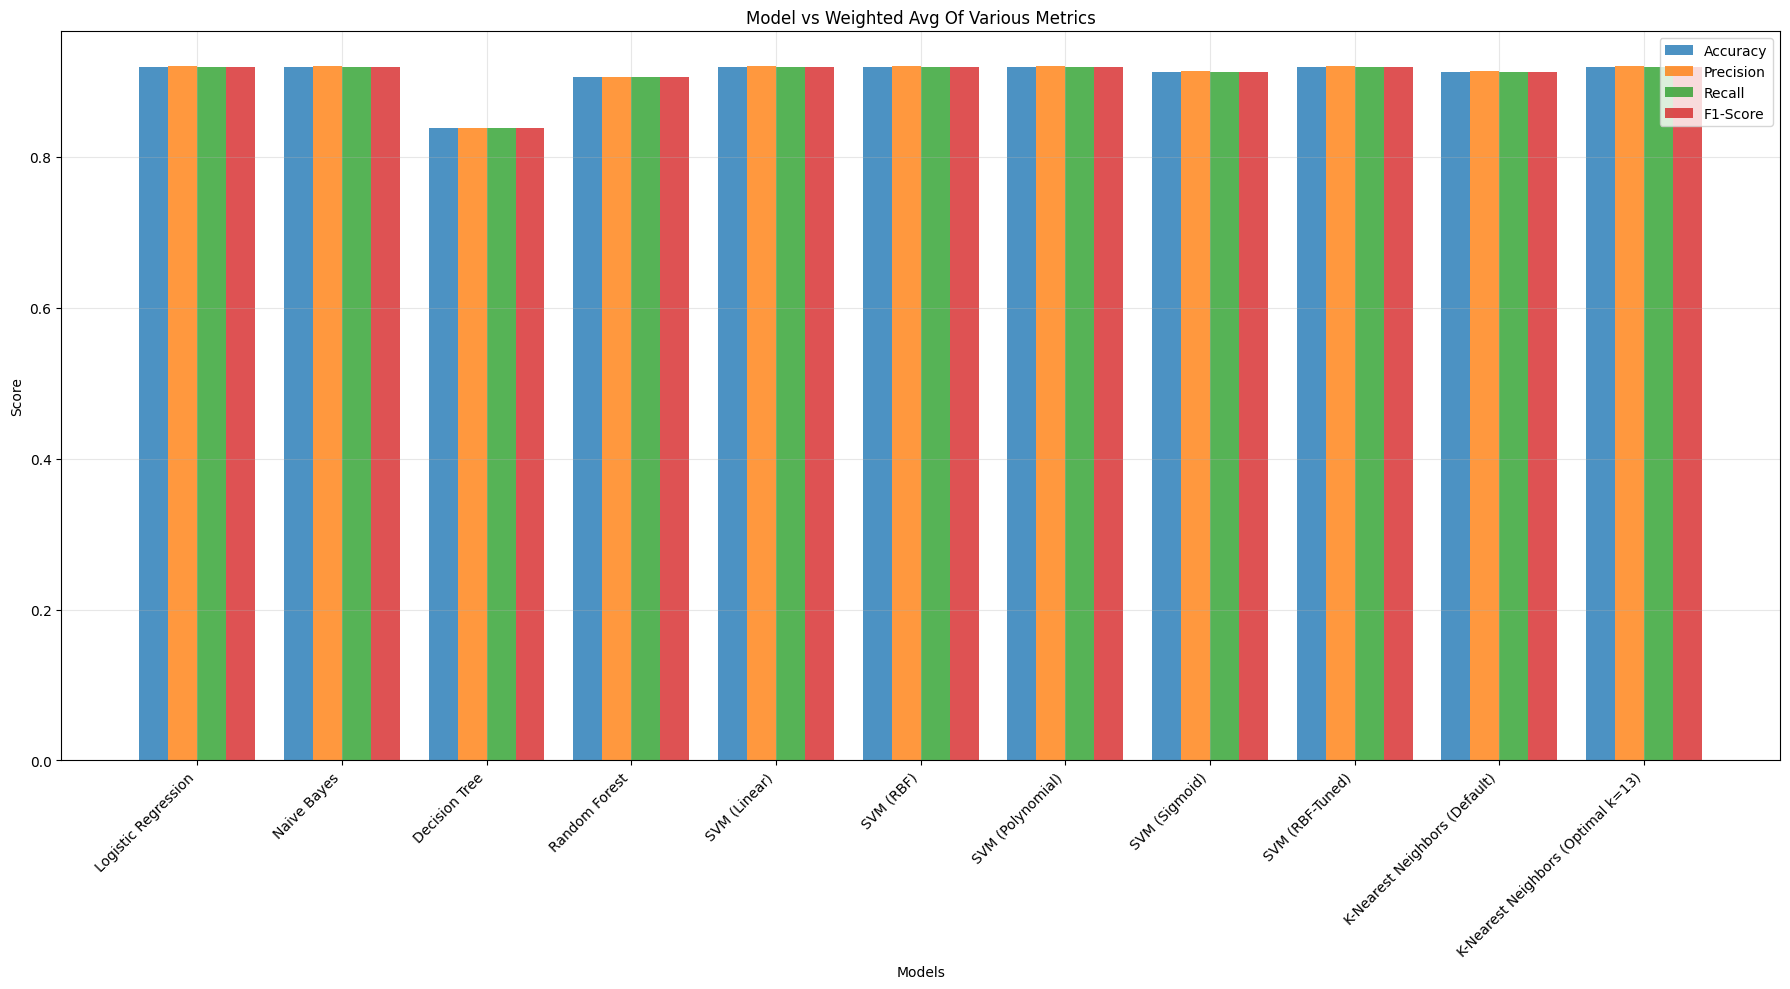

In [ ]:
# Plot performance metrics
plt.figure(figsize=(18, 10))

# Create the comparison plot as requested
x = np.arange(len(models))
width = 0.2

plt.bar(x - 1.5*width, metrics_df['accuracy'], width, label='Accuracy', alpha=0.8)
plt.bar(x - 0.5*width, metrics_df['precision'], width, label='Precision', alpha=0.8)
plt.bar(x + 0.5*width, metrics_df['recall'], width, label='Recall', alpha=0.8)
plt.bar(x + 1.5*width, metrics_df['f1_score'], width, label='F1-Score', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model vs Weighted Avg Of Various Metrics')
plt.xticks(x, metrics_df.index, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Finding optimal K using Elbow Method...


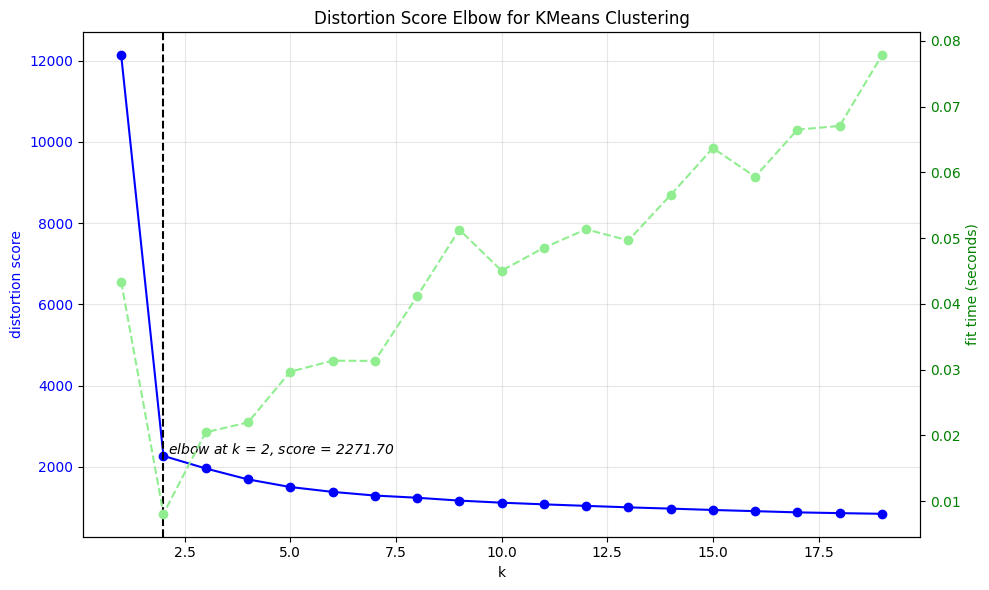

In [ ]:
# K-Means Clustering Analysis

print("Finding optimal K using Elbow Method...")

# checking from 1 to 20
k_range = range(1, 20)
inertias = []
fit_times = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    start_time = time.time()
    kmeans.fit(X_train_scaled)
    end_time = time.time()

    inertias.append(kmeans.inertia_)
    fit_times.append(end_time - start_time)

# Find the "elbow" point - the elbow is determined by 'eye-balling' the graph.
# Manually look for the "elbow" — usually the point of diminishing returns.
# Here we are setting k = 2 to draw a line on the graph. From the graph below,
# it doesn't look like K-Means is able to accurately determine the number of classes in the dataset.
elbow_k = 2  # This should be the correct number of clusters.
elbow_score = inertias[elbow_k - 1]

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary axis: distortion score
ax1.plot(k_range, inertias, 'o-', color='blue', label='distortion score')
ax1.set_xlabel('k')
ax1.set_ylabel('distortion score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Distortion Score Elbow for KMeans Clustering")
ax1.grid(True, alpha=0.3)

# Annotate elbow
ax1.axvline(x=elbow_k, linestyle='--', color='black')
ax1.text(elbow_k + 0.1, elbow_score + 50, f'elbow at $k$ = {elbow_k}, score = {elbow_score:.2f}',
         fontsize=10, style='italic', color='black')

# Secondary axis: fit time
ax2 = ax1.twinx()
ax2.plot(k_range, fit_times, 'o--', color='lightgreen', label='fit time')
ax2.set_ylabel('fit time (seconds)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

In [ ]:
# Apply K-means with optimal K (let's use k=3 based on the classes we have)
optimal_k_means = len(np.unique(y_encoded))
print(f"\nApplying K-Means with k={optimal_k_means}...")

kmeans = KMeans(n_clusters=optimal_k_means, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Add K-means as a "model" for comparison
kmeans_predictions = kmeans.predict(X_test_scaled)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)

print(f"K-Means clustering accuracy: {kmeans_accuracy:.4f}")


Applying K-Means with k=2...
K-Means clustering accuracy: 0.0806


In [ ]:
# Finding the best model

# Find best performing model
best_model_name = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model_name]

print(f"Best performing model: {best_model_name}")
print(f"Best test accuracy: {best_accuracy:.4f}")

# Display top 5 models
sorted_models = sorted(test_accuracies.items(), key=lambda x: x[1], reverse=True)
print("\nTop 5 performing models:")
for i, (name, accuracy) in enumerate(sorted_models[:5], 1):
    print(f"{i}. {name}: {accuracy:.4f}")

Best performing model: Logistic Regression
Best test accuracy: 0.9194

Top 5 performing models:
1. Logistic Regression: 0.9194
2. Naive Bayes: 0.9194
3. SVM (Linear): 0.9194
4. SVM (RBF): 0.9194
5. SVM (Polynomial): 0.9194


Confusion Matrix for Best Model (Logistic Regression)...


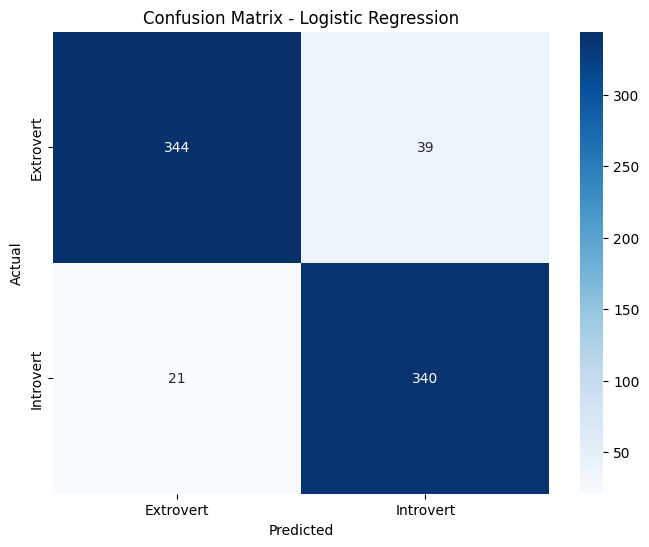

In [ ]:
# Confusion Matrix For Best Model

print(f"Confusion Matrix for Best Model ({best_model_name})...")

# Create confusion matrix
cm = confusion_matrix(y_test, predictions[best_model_name])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Feature Importance Analysis...
Random Forest Feature Importance:
                     feature  importance
1                 Stage_fear    0.228699
0           Time_spent_Alone    0.204750
4  Drained_after_socializing    0.183744
6             Post_frequency    0.114961
2    Social_event_attendance    0.111322
3              Going_outside    0.088290
5        Friends_circle_size    0.068234


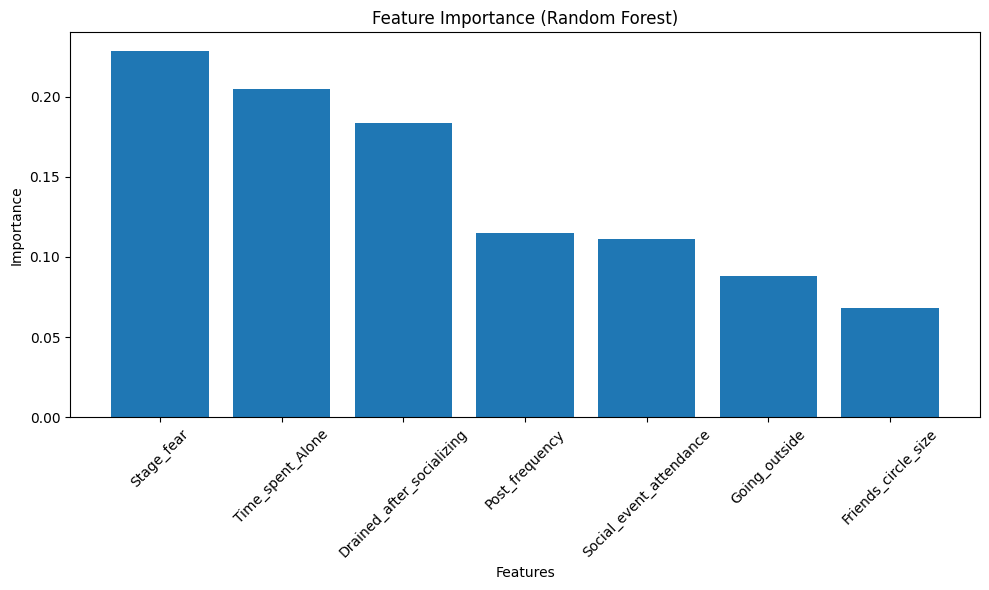

In [ ]:
# Feature Importance (for tree-based models)


print("Feature Importance Analysis...")

# Get feature importance for Random Forest
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Random Forest Feature Importance:")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['feature'], feature_importance['importance'])
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# summary

print("\n" + "="*60)
print("COMPREHENSIVE ANALYSIS SUMMARY")
print("="*60)

print(f"\nDataset: Personality Classification")
print(f"Total samples: {len(df)}")
print(f"Features: {len(X.columns)}")
print(f"Classes: {len(label_encoder.classes_)} ({', '.join(label_encoder.classes_)})")

print(f"\nKNN Optimization Results:")
print(f"├── Default k=5 accuracy: {test_accuracies['K-Nearest Neighbors (Default)']:.4f}")
print(f"├── Optimal k={optimal_k} accuracy: {test_accuracies[f'K-Nearest Neighbors (Optimal k={optimal_k})']:.4f}")

print(f"\nBest Overall Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")

print(f"\nCross Validation Results (Top 5):")
cv_sorted = sorted([(name, scores.mean()) for name, scores in cv_scores.items()],
                   key=lambda x: x[1], reverse=True)
for i, (name, score) in enumerate(cv_sorted[:5], 1):
    print(f"{i}. {name}: {score:.4f}")

print(f"\nTest Accuracy Results (Top 5):")
for i, (name, accuracy) in enumerate(sorted_models[:5], 1):
    print(f"{i}. {name}: {accuracy:.4f}")

print(f"\nK-Means Clustering Accuracy: {kmeans_accuracy:.4f}")

print(f"\nKey Insights:")
print(f"├── Most important features: {feature_importance.head(3)['feature'].tolist() if 'Random Forest' in trained_models else 'N/A'}")
print(f"└── Supervised learning outperformed unsupervised (K-Means) by {best_accuracy - kmeans_accuracy:.4f}")

print("\n" + "="*60)


COMPREHENSIVE ANALYSIS SUMMARY

Dataset: Personality Classification
Total samples: 2477
Features: 7
Classes: 2 (Extrovert, Introvert)

KNN Optimization Results:
├── Default k=5 accuracy: 0.9126
├── Optimal k=13 accuracy: 0.9194

Best Overall Model: Logistic Regression
Best Accuracy: 0.9194

Cross Validation Results (Top 5):
1. K-Nearest Neighbors (Optimal k=13): 0.9285
2. Logistic Regression: 0.9279
3. Naive Bayes: 0.9279
4. SVM (Linear): 0.9279
5. SVM (RBF): 0.9279

Test Accuracy Results (Top 5):
1. Logistic Regression: 0.9194
2. Naive Bayes: 0.9194
3. SVM (Linear): 0.9194
4. SVM (RBF): 0.9194
5. SVM (Polynomial): 0.9194

K-Means Clustering Accuracy: 0.0806

Key Insights:
├── Most important features: ['Stage_fear', 'Time_spent_Alone', 'Drained_after_socializing']
└── Supervised learning outperformed unsupervised (K-Means) by 0.8387



In [ ]:
# Save results for deployment preparation

print("="*60)

# Save results for deployment preparation
print(f"\nSaving best model ({best_model_name}) for deployment...")
import joblib

# Save the best model and scaler
joblib.dump(trained_models[best_model_name], 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model artifacts saved successfully!")
print("Files saved: best_model.pkl, scaler.pkl, label_encoder.pkl")


Saving best model (Logistic Regression) for deployment...
Model artifacts saved successfully!
Files saved: best_model.pkl, scaler.pkl, label_encoder.pkl
